In [42]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(17,15)})
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import datetime
import math

In [43]:
boston = load_boston()
boston_dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_dataset['MEDV'] =  boston.target

In [49]:
boston_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


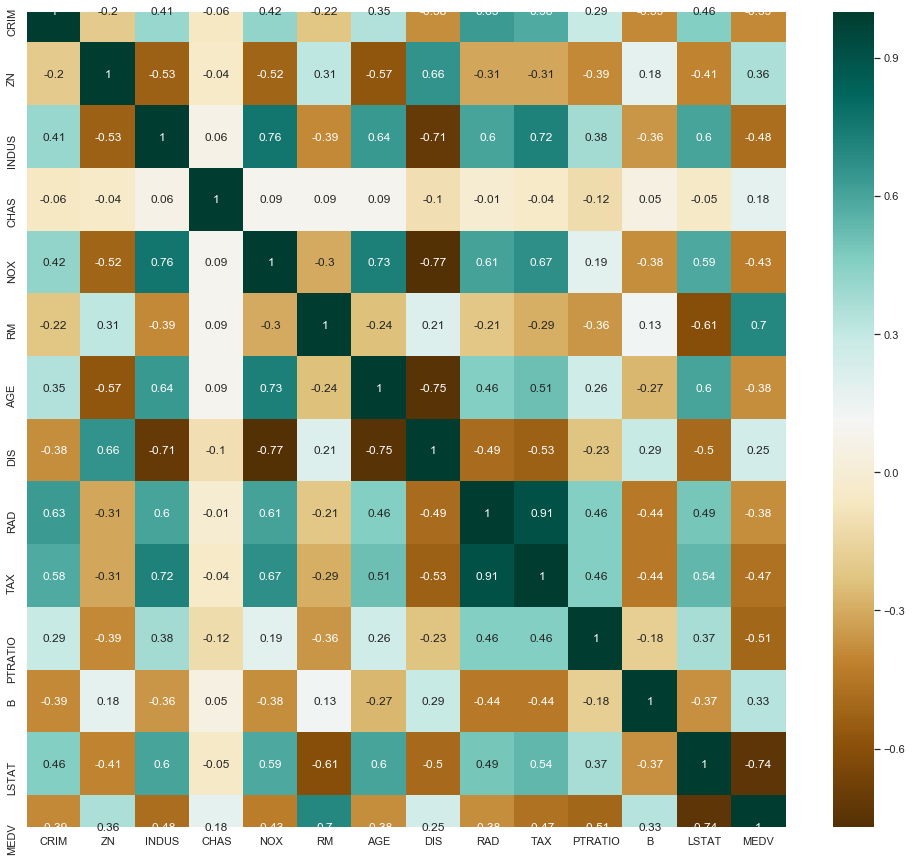

In [50]:
corr_matrix = boston_dataset.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True, cmap="BrBG")
plt.show()

In [51]:
relevant_features = abs(corr_matrix["MEDV"]) # selects the absolute value for each feature with MEDV
relevant_features

CRIM       0.39
ZN         0.36
INDUS      0.48
CHAS       0.18
NOX        0.43
RM         0.70
AGE        0.38
DIS        0.25
RAD        0.38
TAX        0.47
PTRATIO    0.51
B          0.33
LSTAT      0.74
MEDV       1.00
Name: MEDV, dtype: float64

In [52]:
relevant_features = relevant_features[relevant_features > 0.5] # filter for those with correlation indexes higher than 0.5
boston_dataset[["RM", "PTRATIO", "LSTAT"]].corr().round(2)

,RM,PTRATIO,LSTAT
RM,1.00,-0.36,-0.61
PTRATIO,-0.36,1.00,0.37
LSTAT,-0.61,0.37,1.00


In [47]:
X = boston_dataset[['PTRATIO', 'LSTAT']]
Y = boston_dataset['MEDV']

In [54]:
def split_data(x,y,ratio, seed=1):
    np.random.seed(seed)
    num_row = len(y)
    indeces = np.random.permutation(num_row)
    index_split = int(np.floor(ratio * num_row))
    index_tr = indeces[: index_split]
    index_te = indeces[index_split:]
    
    x_tr = x.iloc[index_tr]
    x_te = x.iloc[index_te]
    y_tr = y.iloc[index_tr]
    y_te = y.iloc[index_te]
    
    return x_tr, x_te, y_tr, y_te

In [56]:
def standardize(x):
    return (x - x.mean(axis=0)) / x.std(axis=0)
def build_model_data(x):
    num_samples = y.shape[0]
    x["INTERCEPT"] = pd.Series(np.ones(num_samples))
    return x

In [58]:
def prepare_model(X, y, r, s):
    X_train, X_test, y_train, y_test = split_data(X, y, r, seed=s)
    X_train = standardize(X_train)
    X_train = build_model(X_test)
    
    X_test = standarize(X_test)
    X_test = build_model_data(X_test)
    return X_train, X_test, y_train, y_test